In [703]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

### PART A

In [704]:
lab2_dataset = pd.read_csv('../../practical_labs/datasets/Lab_2/Lab2_dataset.csv')
lab2_dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [705]:
# Creating a new instance of count vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer

CountVectorizer()

In [706]:
# Extracting the text and label columns
text = lab2_dataset['text']
label = lab2_dataset['label']

# Counts the number of words in the document
X = count_vectorizer.fit_transform(text)

In [707]:
lab2_dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [708]:
# Split the test and training data
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2)

In [709]:
# Train SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [710]:
# Evaluate SVC model
svc_pred = svc_model.predict(X_test)

# Define the prediction variable and the actual variable
pred = svc_pred
actual = y_test

# Print the accuracy of the model
svc_accuracy = accuracy_score(actual, pred)
print("SVC Accuracy:", svc_accuracy)

SVC Accuracy: 0.9526570048309179


### Using SVC model would be a good approach since it doesn't make the same assumptions as the other Naiive Bayes models as the note says. It works well for both independent and dependent variables. It is also a good model to use when the data is not normally distributed.

In [711]:
# Train Gaussian Naiive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train.toarray(), y_train)  # Note: toarray() is used to convert sparse matrix to array

GaussianNB()

In [712]:
# Evaluate Gaussian Naiive Bayes model

# Convert the sparse matrix to array
X_arr = X_test.toarray()
gnb_pred = gnb_model.predict(X_arr)

# Define the prediction variable and the actual variable
pred = gnb_pred
actual = y_test

# Print the accuracy of the model
gnb_accuracy = accuracy_score(actual, pred)
print("GNB Accuracy:", gnb_accuracy)


GNB Accuracy: 0.9555555555555556


### Using Gaussian Naiive Bayes model wouldn't be the best approach for this case because we are dealing with a right-skewed distribution. This model is better for normally distributed data and independent features, which in this case feaures are not independent. 

In [713]:
# Classify the data
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [714]:
mnb_pred = mnb_model.predict(X_test)
mnb_actual = y_test

# Define the prediction variable and the actual variable
pred = mnb_pred
actual = y_test

# Print the accuracy of the model
mnb_accuracy = accuracy_score(actual, pred)
print("MNB Accuracy:", mnb_accuracy)

MNB Accuracy: 0.9816425120772947


### Using Multinomial Naiive Bayes it's the best option for text classification and it is a good approach when it comes to observing counts.


### PART B

In [715]:
import matplotlib.pyplot as plt

In [716]:
ab_nyc_2019 = pd.read_csv('../../practical_labs/datasets/Lab_2/AB_NYC_2019.csv')
ab_nyc_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


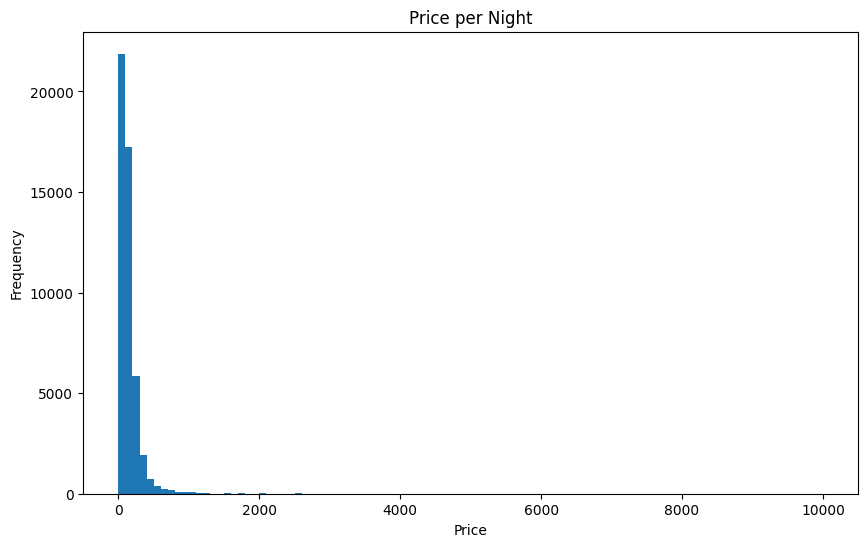

In [717]:
price = ab_nyc_2019['price']
plt.figure(figsize=(10, 6))
plt.hist(price, bins=100)
plt.title('Price per Night')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### It is a positively-skewed distribution, so it's better to use the median as a representative measure of central tendency

In [718]:
# Describe the price column to crearly see the mean, standard deviation, min, max, etc.
price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Z-score approach

In [719]:
ab_nyc_2019['z_score'] = (price - price.mean()) / price.std()
outliers_z = ab_nyc_2019['z_score'] <- 3 | (ab_nyc_2019['z_score'] > 3)
print("Original dataset:", ab_nyc_2019.shape)
print("Clean dataset Z-score approach:", ab_nyc_2019[outliers_z].shape)

Original dataset: (48895, 17)
Clean dataset Z-score approach: (46758, 17)


## Whiskers approach

In [720]:
#  Calculate the left and right whiskers
Q1 = ab_nyc_2019['price'].quantile(0.25)
Q3 = ab_nyc_2019['price'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Print the lower and upper bound
outliers_whiskers = (ab_nyc_2019['price'] > lower_bound) & (ab_nyc_2019['price'] < upper_bound)

print("Original dataset:", ab_nyc_2019.shape)
print("Clean dataset Whiskers approach:", ab_nyc_2019[outliers_whiskers].shape)

Original dataset: (48895, 17)
Clean dataset Whiskers approach: (45918, 17)


#### In this case it's better to use the whiskers approach, because the distribution is positively-skewed, and if we use the mean and standard deviation or z-score, we will get more outliers.